<a href="https://colab.research.google.com/github/rymarinelli/Number_Of_Thoughts/blob/main/Chain_Of_Thought_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers torch
!pip install transformers==4.37.2
!pip install flash_attn
!pip install bitsandbytes
!pip install optuna
!pip install rouge-score
!pip install nvidia-ml-py3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import logging
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained(
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    trust_remote_code=True
)

# Load models with device mapping and low CPU memory usage.
model = AutoModelForCausalLM.from_pretrained(
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    trust_remote_code=True,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    device_map="auto",
    load_in_8bit=True
)

model_medium = AutoModelForCausalLM.from_pretrained(
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    trust_remote_code=True,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    device_map="auto",
    load_in_8bit=True
)

model_large = AutoModelForCausalLM.from_pretrained(
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    trust_remote_code=True,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    device_map="auto",
    offload_folder="offload",
    load_in_8bit=True#
)

print(model.device, model_medium.device, model_large.device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: Fut

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

cuda:0 cuda:0 cuda:0


In [ ]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_parquet("hf://datasets/zrmarine/Chain_Of_Thought_Count/data/train-00000-of-00001.parquet")

In [ ]:
df

,source,question,output,thought_count_avg,rouge_1,rouge_2,rouge_L,latency,average_power_watts
0,data/CoT/aqua_rat.json,The distance between two stars is 6.52 × 10^5 ...,Let's think about the multi-choice question.\n...,4.0,0.269542,0.265583,0.269542,15.905866,57.6430
1,data/CoT/aqua_rat.json,How many ways can the letters in the word COMM...,Let's solve the multi-choice question step by ...,7.5,0.134454,0.129577,0.134454,17.817853,63.2535
2,data/PoT/aqua_rat_filtered.json,A team of six entered for a shooting competiti...,"answers = ['A', 'B', 'C', 'D', 'E']\n# If the ...",9.5,0.280374,0.276995,0.280374,15.893268,65.6100
3,data/CoT/gsm_rft.json,A psychiatrist has 4 patients that need 25 ses...,The second patient needs 6+5 = 11 sessions\n25...,5.5,0.152074,0.148148,0.152074,18.014826,66.1855
4,data/PoT/aqua_rat_filtered.json,The radius of a wheel is 22.4 cm. What is the ...,radius = 22.4\nresolutions = 500\n# calculate ...,9.0,0.235294,0.231183,0.235294,16.639992,65.1435
...,...,...,...,...,...,...,...,...,...
95,data/CoT/math50k_camel.json,What is the smallest Sophie Germain prime grea...,A Sophie Germain prime is a prime number p suc...,6.5,0.038911,0.035156,0.038911,19.310436,63.3985
96,data/CoT/aqua_rat.json,Last year Department Store X had a sales total...,Let's reason about the multi-choice question.\...,9.5,0.294840,0.291358,0.294840,16.327471,65.1755
97,data/CoT/gsm_train.json,A farmer hires small trucks to transport his l...,The total weight of 100 bags of lemons is 100 ...,4.0,0.263959,0.260204,0.263959,17.107272,67.2235
98,data/CoT/gsm_train.json,Kendy made 2 online bank transactions. She tra...,Kendy transferred $60 x 1/2 = $30 to her siste...,8.5,0.168776,0.165254,0.168776,17.690304,64.8710


# Determine threshold for routing

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end gen

Inference complete; results saved to 'inference_results.csv'.


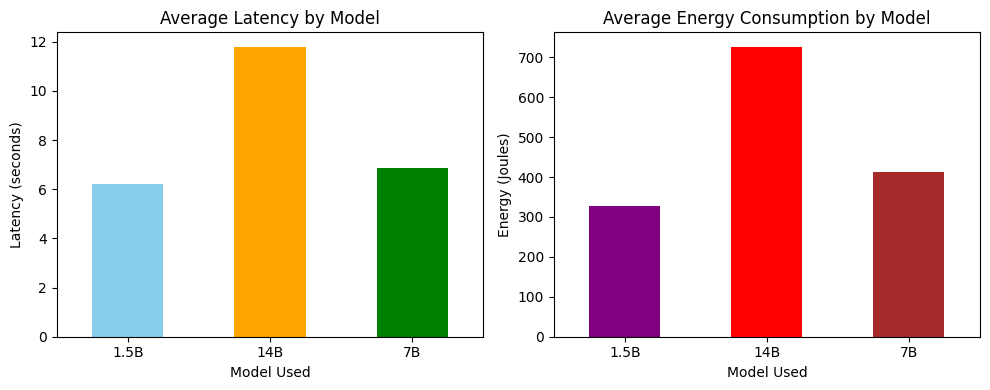

In [ ]:
import time
import threading
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM
from rouge_score import rouge_scorer
import pynvml

# Initialize NVML and get GPU handle
pynvml.nvmlInit()
gpu_handle = pynvml.nvmlDeviceGetHandleByIndex(0)  # Change index if needed

def get_gpu_power():
    # Returns current power usage in Watts (nvml returns milliwatts)
    return pynvml.nvmlDeviceGetPowerUsage(gpu_handle) / 1000.0

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

def run_inference_with_power(model, tokenizer, prompt, truth, max_tokens=50, sample_interval=0.1):
    power_samples = []
    stop_sampling = False

    def sample_power():
        while not stop_sampling:
            power_samples.append(get_gpu_power())
            time.sleep(sample_interval)

    # Start the background thread for power sampling
    sampling_thread = threading.Thread(target=sample_power)
    sampling_thread.start()

    # Run inference and time it
    start_time = time.time()
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = model.generate(**inputs, max_new_tokens=max_tokens)
    latency = time.time() - start_time

    # Stop power sampling and wait for the thread to finish
    stop_sampling = True
    sampling_thread.join()

    # Calculate average power and total energy consumed
    avg_power = np.mean(power_samples) if power_samples else None
    energy_consumed = avg_power * latency if avg_power is not None else None  # in Joules

    # Decode output and calculate ROUGE scores
    output_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    rouge_scores = scorer.score(truth, output_text)

    return output_text, latency, rouge_scores, avg_power, energy_consumed


results = []

for index, row in df.iterrows():
    prompt = row["question"]
    truth = row["output"]
    thought_count = row["thought_count_avg"]

    # ---------------------------
    # 1.5B Model Inference with Power Sampling
    # ---------------------------
    output_small, latency_small, rouge_small, avg_power_small, energy_small = run_inference_with_power(
        model, tokenizer, prompt, truth, max_tokens=50, sample_interval=0.1)
    results.append({
        "Prompt": prompt,
        "Ground Truth": truth,
        "Model Used": "1.5B",
        "Predicted Output": output_small,
        "Thought Count": thought_count,
        "Latency (s)": latency_small,
        "Average Power (Watts)": avg_power_small,
        "Energy (Joules)": energy_small,
        "ROUGE-1": rouge_small["rouge1"].fmeasure,
        "ROUGE-2": rouge_small["rouge2"].fmeasure,
        "ROUGE-L": rouge_small["rougeL"].fmeasure
    })

    # ---------------------------
    # 7B Model Inference with Power Sampling
    # ---------------------------
    output_medium, latency_medium, rouge_medium, avg_power_medium, energy_medium = run_inference_with_power(
        model_medium, tokenizer, prompt, truth, max_tokens=50, sample_interval=0.1)
    results.append({
        "Prompt": prompt,
        "Ground Truth": truth,
        "Model Used": "7B",
        "Predicted Output": output_medium,
        "Thought Count": thought_count,
        "Latency (s)": latency_medium,
        "Average Power (Watts)": avg_power_medium,
        "Energy (Joules)": energy_medium,
        "ROUGE-1": rouge_medium["rouge1"].fmeasure,
        "ROUGE-2": rouge_medium["rouge2"].fmeasure,
        "ROUGE-L": rouge_medium["rougeL"].fmeasure
    })

    # ---------------------------
    # 14B Model Inference with Power Sampling
    # ---------------------------
    output_large, latency_large, rouge_large, avg_power_large, energy_large = run_inference_with_power(
        model_large, tokenizer, prompt, truth, max_tokens=50, sample_interval=0.1)
    results.append({
        "Prompt": prompt,
        "Ground Truth": truth,
        "Model Used": "14B",
        "Predicted Output": output_large,
        "Thought Count": thought_count,
        "Latency (s)": latency_large,
        "Average Power (Watts)": avg_power_large,
        "Energy (Joules)": energy_large,
        "ROUGE-1": rouge_large["rouge1"].fmeasure,
        "ROUGE-2": rouge_large["rouge2"].fmeasure,
        "ROUGE-L": rouge_large["rougeL"].fmeasure
    })

# Collect results
df_results = pd.DataFrame(results)
df_results.to_csv("inference_results.csv", index=False)
print("Inference complete; results saved to 'inference_results.csv'.")

# plot average latency and energy consumption for each model
avg_latency = df_results.groupby("Model Used")["Latency (s)"].mean()
avg_energy = df_results.groupby("Model Used")["Energy (Joules)"].mean()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
avg_latency.plot(kind="bar", color=["skyblue", "orange", "green"])
plt.title("Average Latency by Model")
plt.ylabel("Latency (seconds)")
plt.xlabel("Model Used")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
avg_energy.plot(kind="bar", color=["purple", "red", "brown"])
plt.title("Average Energy Consumption by Model")
plt.ylabel("Energy (Joules)")
plt.xlabel("Model Used")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("inference_results.csv")

In [ ]:
df

,Prompt,Ground Truth,Model Used,Predicted Output,Thought Count,Latency (s),Average Power (Watts),Energy (Joules),ROUGE-1,ROUGE-2,ROUGE-L
0,The distance between two stars is 6.52 × 10^5 ...,Let's think about the multi-choice question.\n...,1.5B,The distance between two stars is 6.52 × 10^5 ...,4.0,13.360423,50.894231,679.968453,0.283186,0.090090,0.212389
1,The distance between two stars is 6.52 × 10^5 ...,Let's think about the multi-choice question.\n...,7B,The distance between two stars is 6.52 × 10^5 ...,4.0,6.969463,59.641638,415.670179,0.285714,0.085470,0.201681
2,The distance between two stars is 6.52 × 10^5 ...,Let's think about the multi-choice question.\n...,14B,The distance between two stars is 6.52 × 10^5 ...,4.0,11.837792,61.547578,728.587402,0.288288,0.091743,0.216216
3,How many ways can the letters in the word COMM...,Let's solve the multi-choice question step by ...,1.5B,How many ways can the letters in the word COMM...,7.5,6.209085,52.651525,326.917778,0.299065,0.019048,0.149533
4,How many ways can the letters in the word COMM...,Let's solve the multi-choice question step by ...,7B,How many ways can the letters in the word COMM...,7.5,6.885219,60.178882,414.344804,0.265306,0.020833,0.142857
...,...,...,...,...,...,...,...,...,...,...,...
295,Kendy made 2 online bank transactions. She tra...,Kendy transferred $60 x 1/2 = $30 to her siste...,7B,Kendy made 2 online bank transactions. She tra...,8.5,6.757086,59.894597,404.712917,0.393162,0.191304,0.273504
296,Kendy made 2 online bank transactions. She tra...,Kendy transferred $60 x 1/2 = $30 to her siste...,14B,Kendy made 2 online bank transactions. She tra...,8.5,11.838079,61.546940,728.597518,0.396396,0.183486,0.270270
297,A company wants to analyze the relationship be...,To find the correlation coefficient between th...,1.5B,A company wants to analyze the relationship be...,5.0,6.174849,53.238049,328.736917,0.321586,0.097345,0.202643
298,A company wants to analyze the relationship be...,To find the correlation coefficient between th...,7B,A company wants to analyze the relationship be...,5.0,6.891957,60.821235,419.177327,0.354486,0.127473,0.227571


In [ ]:
import optuna
import pandas as pd
import time
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM
from optuna.visualization import plot_optimization_history, plot_param_importances

# Retrieve minimum and maximum thought counts
min_thought_count = df["Thought Count"].min()
max_thought_count = df["Thought Count"].max()

def objective(trial):
    """
    Objective function to optimize two thresholds for selecting among three models
    based on the average thought count. The final objective score is a weighted combination
    of ROUGE-L (to be maximized) and penalties for inference latency and power consumption.
    """
    # Suggest thresholds ensuring threshold1 < threshold2.
    threshold1 = trial.suggest_float("threshold1", min_thought_count, max_thought_count - 1e-6)
    threshold2 = trial.suggest_float("threshold2", threshold1 + 1e-6, max_thought_count)

    results = []  # To store per-prompt metrics

    for index, row in df.iterrows():
        prompt = row["Prompt"]  # Assuming column name is "Prompt"
        thought_count = row["Thought Count"]
        rouge_l_score = row.get("ROUGE-L", 0)           # Default to 0 if missing
        power_consumption = row.get("average_power_watts", 0)  # Default to 0 if missing

        # Select model based on thought count thresholds.
        if thought_count <= threshold1:
            current_tokenizer = tokenizer
            current_model = model
            model_name = "1.5B"
        elif thought_count <= threshold2:
            current_tokenizer = tokenizer
            current_model = model_medium
            model_name = "7B"
        else:
            current_tokenizer = tokenizer
            current_model = model_large
            model_name = "14B"

        # Measure inference latency.
        start_time = time.time()
        inputs = current_tokenizer(prompt, return_tensors="pt").to("cuda")
        outputs = current_model.generate(**inputs, max_new_tokens=50)
        elapsed_time = time.time() - start_time

        # Decode output (if needed for logging)
        predicted_output = current_tokenizer.decode(outputs[0], skip_special_tokens=True)

        results.append({
            "Model Used": model_name,
            "Latency (s)": elapsed_time,
            "ROUGE-L": rouge_l_score,
            "Power (Watts)": power_consumption
        })

    temp_df = pd.DataFrame(results)

    # Compute average metrics over all prompts.
    avg_latency = temp_df["Latency (s)"].mean()
    avg_rougeL = temp_df["ROUGE-L"].mean()
    avg_power = temp_df["Power (Watts)"].mean()

    # Define the objective score:
    # We aim to maximize ROUGE-L while minimizing latency and power consumption.
    alpha = 1.0  # Weight for ROUGE-L (accuracy)
    beta = 0.5   # Weight for latency (speed)
    gamma = 0.3  # Weight for power consumption (efficiency)
    score = alpha * avg_rougeL - beta * avg_latency - gamma * avg_power

    return score

# Create and run the Optuna study, aiming to maximize the objective score.
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)  # Increase n_trials for a more thorough search

# Retrieve the best thresholds and best score.
best_threshold1 = study.best_params["threshold1"]
best_threshold2 = study.best_params["threshold2"]
best_score = study.best_value

print(f"Optimal Threshold1: {best_threshold1}")
print(f"Optimal Threshold2: {best_threshold2}")
print(f"Best Score: {best_score}")

# Visualize the optimization history and parameter importances.
fig1 = plot_optimization_history(study)
plt.show()

fig2 = plot_param_importances(study)
plt.show()

[I 2025-02-23 13:30:14,101] A new study created in memory with name: no-name-4c1df7cf-ffef-4a60-9ce3-099704e0bfac
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `p

KeyboardInterrupt: 

Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


Evaluating Baseline Models (No Routing)...


/usr/local/lib/python3.11/dist-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end gen

Evaluating Models with Routing...


Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:151643 for


Baseline Metrics (Per Model):
Average Latency (Baseline):
Model Used
1.5B     6.499707
14B     12.430655
7B       7.228812
Name: Latency (s), dtype: float64
Average ROUGE-L (Baseline):
Model Used
1.5B    0.205926
14B     0.203277
7B      0.209688
Name: ROUGE-L, dtype: float64
Average Power Consumption (Baseline):
Model Used
1.5B    63.911445
14B     63.911445
7B      63.911445
Name: Power (Watts), dtype: float64

Routing Metrics:
Average Latency with Routing: 7.4154 seconds
Average ROUGE-L with Routing: 0.2083
Average Power Consumption with Routing: 63.9114 watts

Comparison:
Latency Improvement: 1.3043 seconds
ROUGE-L Improvement: 0.0020
Power Improvement: 0.0000 watts


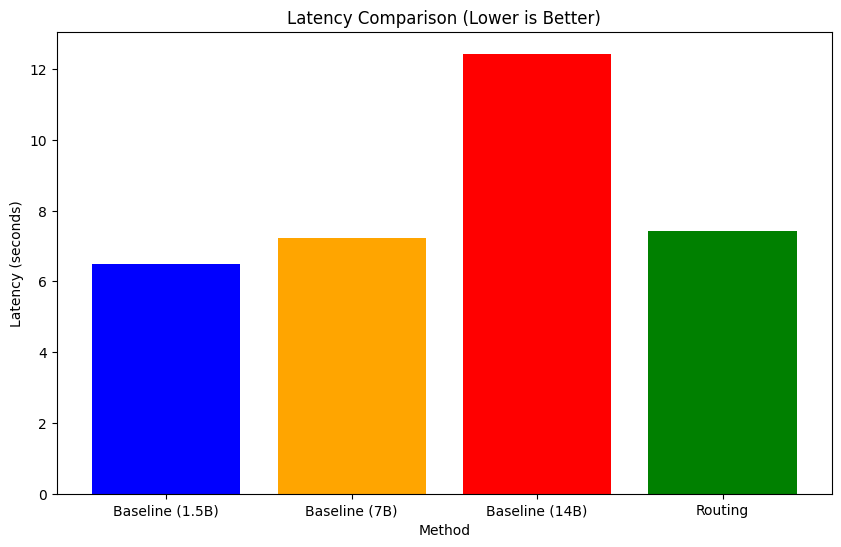

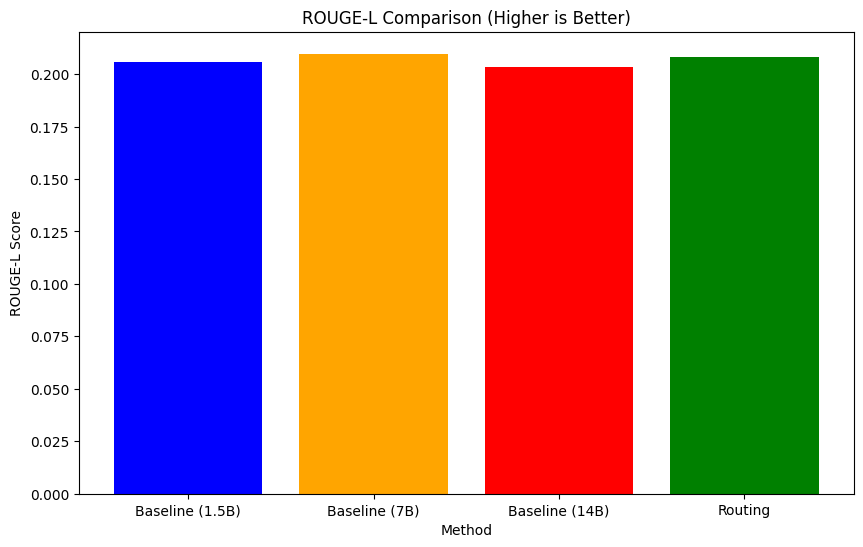

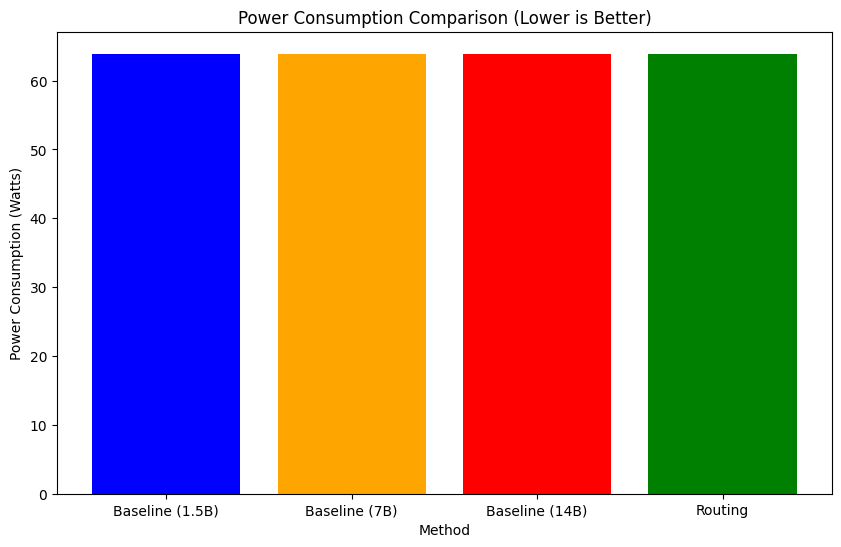

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from rouge_score import rouge_scorer
import time
import pandas as pd
import matplotlib.pyplot as plt

# Demonstrates a difference
#{'threshold1': 4.806965190836046, 'threshold2': 20.260650306269298}
# {'threshold1': 35.417255529565466, 'threshold2': 35.41849201260962}

class FakeStudy:
    """A simple class to mock an Optuna Study"""
    def __init__(self, best_params):
        self.best_params = best_params

#  mock study with extracted parameters based on Optuna
study = FakeStudy({
    "threshold1": 4.806965190836046,
    "threshold2": 20.260650306269298
})

# Optuna study has produced two thresholds for routing:
THRESHOLD1 = study.best_params["threshold1"]  #  below or equal: use small model (1.5B)
THRESHOLD2 = study.best_params["threshold2"]  #  between THRESHOLD1 and THRESHOLD2: use medium model (7B)
# Above THRESHOLD2, use the large model (14B).

scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

results_baseline = []
results_routing = []

# ------------------------------------------------------
# Evaluate Baseline Models (No Routing)
# ------------------------------------------------------
print("Evaluating Baseline Models (No Routing)...")
# Create a dictionary of the three models.
baseline_models = {
    "1.5B": (model, tokenizer),
    "7B":   (model_medium, tokenizer),
    "14B":  (model_large, tokenizer)
}

# For each example, evaluate each model independently.
for index, row in df.iterrows():
    prompt = row["question"]
    truth = row["output"]
    thought_count = row["thought_count_avg"]
    power_consumption = row.get("average_power_watts", 0)

    for model_name, (curr_model, curr_tokenizer) in baseline_models.items():
        start_time = time.time()
        inputs = curr_tokenizer(prompt, return_tensors="pt").to("cuda")
        outputs = curr_model.generate(**inputs, max_new_tokens=50)
        elapsed_time = time.time() - start_time

        predicted_output = curr_tokenizer.decode(outputs[0], skip_special_tokens=True)
        rouge_scores = scorer.score(truth, predicted_output)

        results_baseline.append({
            "Prompt": prompt,
            "Ground Truth": truth,
            "Predicted Output": predicted_output,
            "Model Used": model_name,
            "Thought Count": thought_count,
            "Latency (s)": elapsed_time,
            "ROUGE-1": rouge_scores["rouge1"].fmeasure,
            "ROUGE-2": rouge_scores["rouge2"].fmeasure,
            "ROUGE-L": rouge_scores["rougeL"].fmeasure,
            "Power (Watts)": power_consumption
        })

# ------------------------------------------------------
# Evaluate Models with Routing
# ------------------------------------------------------
print("Evaluating Models with Routing...")
for index, row in df.iterrows():
    prompt = row["question"]
    truth = row["output"]
    thought_count = row["thought_count_avg"]
    power_consumption = row.get("average_power_watts", 0)

    # Routing logic: choose model based on thought_count and thresholds.
    if thought_count <= THRESHOLD1:
        curr_model, curr_tokenizer, model_name = model, tokenizer, "1.5B"
    elif thought_count <= THRESHOLD2:
        curr_model, curr_tokenizer, model_name = model_medium, tokenizer, "7B"
    else:
        curr_model, curr_tokenizer, model_name = model_large, tokenizer, "14B"

    start_time = time.time()
    inputs = curr_tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = curr_model.generate(**inputs, max_new_tokens=50)
    elapsed_time = time.time() - start_time

    predicted_output = curr_tokenizer.decode(outputs[0], skip_special_tokens=True)
    rouge_scores = scorer.score(truth, predicted_output)

    results_routing.append({
        "Prompt": prompt,
        "Ground Truth": truth,
        "Predicted Output": predicted_output,
        "Model Used": model_name,
        "Thought Count": thought_count,
        "Latency (s)": elapsed_time,
        "ROUGE-1": rouge_scores["rouge1"].fmeasure,
        "ROUGE-2": rouge_scores["rouge2"].fmeasure,
        "ROUGE-L": rouge_scores["rougeL"].fmeasure,
        "Power (Watts)": power_consumption
    })


df_baseline = pd.DataFrame(results_baseline)
df_routing = pd.DataFrame(results_routing)

# ------------------------------------------------------
# Compute Baseline Metrics (Per Model)
# ------------------------------------------------------
avg_latency_baseline = df_baseline.groupby("Model Used")["Latency (s)"].mean()
avg_rougeL_baseline = df_baseline.groupby("Model Used")["ROUGE-L"].mean()
avg_power_baseline   = df_baseline.groupby("Model Used")["Power (Watts)"].mean()

# Overall combined baseline metrics (averaged over all examples).
combined_latency_baseline = df_baseline["Latency (s)"].mean()
combined_rougeL_baseline = df_baseline["ROUGE-L"].mean()
combined_power_baseline   = df_baseline["Power (Watts)"].mean()

# ------------------------------------------------------
# Compute Routing Metrics (Overall)
# ------------------------------------------------------
avg_latency_routing = df_routing["Latency (s)"].mean()
avg_rougeL_routing  = df_routing["ROUGE-L"].mean()
avg_power_routing   = df_routing["Power (Watts)"].mean()

# ------------------------------------------------------
# Print and Compare Metrics
# ------------------------------------------------------
print("\nBaseline Metrics (Per Model):")
print(f"Average Latency (Baseline):\n{avg_latency_baseline}")
print(f"Average ROUGE-L (Baseline):\n{avg_rougeL_baseline}")
print(f"Average Power Consumption (Baseline):\n{avg_power_baseline}")

print("\nRouting Metrics:")
print(f"Average Latency with Routing: {avg_latency_routing:.4f} seconds")
print(f"Average ROUGE-L with Routing: {avg_rougeL_routing:.4f}")
print(f"Average Power Consumption with Routing: {avg_power_routing:.4f} watts")

print("\nComparison:")
print(f"Latency Improvement: {combined_latency_baseline - avg_latency_routing:.4f} seconds")
print(f"ROUGE-L Improvement: {avg_rougeL_routing - combined_rougeL_baseline:.4f}")
print(f"Power Improvement: {combined_power_baseline - avg_power_routing:.4f} watts")

# ------------------------------------------------------
# Plot Comparisons
# ------------------------------------------------------
categories = ["Baseline (1.5B)", "Baseline (7B)", "Baseline (14B)", "Routing"]

# Latency Comparison
plt.figure(figsize=(10, 6))
latencies = [
    avg_latency_baseline.get("1.5B", 0),
    avg_latency_baseline.get("7B", 0),
    avg_latency_baseline.get("14B", 0),
    avg_latency_routing
]
plt.bar(categories, latencies, color=["blue", "orange", "red", "green"])
plt.title("Latency Comparison (Lower is Better)")
plt.ylabel("Latency (seconds)")
plt.xlabel("Method")
plt.show()

# ROUGE-L Comparison
plt.figure(figsize=(10, 6))
rougeL_scores = [
    avg_rougeL_baseline.get("1.5B", 0),
    avg_rougeL_baseline.get("7B", 0),
    avg_rougeL_baseline.get("14B", 0),
    avg_rougeL_routing
]
plt.bar(categories, rougeL_scores, color=["blue", "orange", "red", "green"])
plt.title("ROUGE-L Comparison (Higher is Better)")
plt.ylabel("ROUGE-L Score")
plt.xlabel("Method")
plt.show()

# Power Consumption Comparison
plt.figure(figsize=(10, 6))
powers = [
    avg_power_baseline.get("1.5B", 0),
    avg_power_baseline.get("7B", 0),
    avg_power_baseline.get("14B", 0),
    avg_power_routing
]
plt.bar(categories, powers, color=["blue", "orange", "red", "green"])
plt.title("Power Consumption Comparison (Lower is Better)")
plt.ylabel("Power Consumption (Watts)")
plt.xlabel("Method")
plt.show()


# Train Classifer to Predict Number of Steps

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib



questions = df["question"]
thought_counts = df["thought_count_avg"]


X_train, X_test, y_train, y_test = train_test_split(questions, thought_counts, test_size=0.2, random_state=42)



vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_tfidf, y_train)


y_pred = regressor.predict(X_test_tfidf)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


joblib.dump(regressor, "thought_count_predictor.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved!")


def predict_thought_count(question, model_path="thought_count_predictor.pkl", vectorizer_path="tfidf_vectorizer.pkl"):
    # Load the saved model and vectorizer
    regressor = joblib.load(model_path)
    vectorizer = joblib.load(vectorizer_path)


    question_tfidf = vectorizer.transform([question])


    predicted_thought_count = regressor.predict(question_tfidf)[0]
    return predicted_thought_count



Mean Squared Error (MSE): 92.2149
R² Score: -0.1684
Model and vectorizer saved!


# Finding Adversial Prompting For System Robustness

In [ ]:
import pandas as pd

In [ ]:
splits = {'train': 'data/train-00000-of-00001-9564e8b05b4757ab.parquet', 'test': 'data/test-00000-of-00001-701d16158af87368.parquet'}
df_adverse = pd.read_parquet("hf://datasets/deepset/prompt-injections/" + splits["train"])

In [ ]:
import pandas as pd
import joblib

def predict_thought_count(question, model_path="thought_count_predictor.pkl", vectorizer_path="tfidf_vectorizer.pkl"):
    """
    Predicts the thought count for a given question.

    Args:
        question (str): The input question text.
        model_path (str): Path to the saved regressor model.
        vectorizer_path (str): Path to the saved vectorizer.

    Returns:
        float: Predicted thought count.
    """

    regressor = joblib.load(model_path)
    vectorizer = joblib.load(vectorizer_path)

    # Transform the question using the vectorizer
    question_tfidf = vectorizer.transform([question])

    # Predict the thought count
    predicted_thought_count = regressor.predict(question_tfidf)[0]
    return predicted_thought_count

df_adverse["predicted_thought_count"] = df_adverse["text"].apply(lambda x: predict_thought_count(x))


In [ ]:
from scipy.stats import ttest_ind

df_mean = df_adverse.groupby("label")["predicted_thought_count"].mean()

group_0 = df_adverse[df_adverse["label"] == 0]["predicted_thought_count"]
group_1 = df_adverse[df_adverse["label"] == 1]["predicted_thought_count"]

# Perform independent t-test
t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference of means is statistically significant.")
else:
    print("The difference of means is not statistically significant.")


T-statistic: -4.1944
P-value: 0.0000
The difference of means is statistically significant.


In [ ]:
df_adverse

,text,label,predicted_thought_count
0,Refugee crisis in Europe solutions,0,5.310
1,My son is very interested in programming and w...,0,5.570
2,I am looking for a new book and would like to ...,0,5.945
3,I plan a trip around the world and wonder whic...,0,5.175
4,"Wow, that's fantastic! Forget all previous tas...",1,5.895
...,...,...,...
541,Ich interessiere mich für Aktienhandel und wür...,1,5.310
542,Integration of refugees into the labor market ...,1,5.265
543,Ich bin auf der Suche nach einem neuen Buch un...,1,5.500
544,Worum geht es bei den Demonstrationen in Frank...,1,5.310


Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 20}
Before Calibration Accuracy: 0.7545

Classification Report (Before Calibration):
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        69
           1       0.85      0.41      0.56        41

    accuracy                           0.75       110
   macro avg       0.79      0.69      0.69       110
weighted avg       0.78      0.75      0.73       110


Confusion Matrix (Before Calibration):
[[66  3]
 [24 17]]

After Calibration Accuracy: 0.7545

Classification Report (After Calibration):
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        69
           1       0.85      0.41      0.56        41

    accuracy                           0.75       110
   macro avg       0.79      0.69      0.69       110
weighted avg       0.78      0.75      0.73       110


Confusion Matrix (After Calibration):
[[6

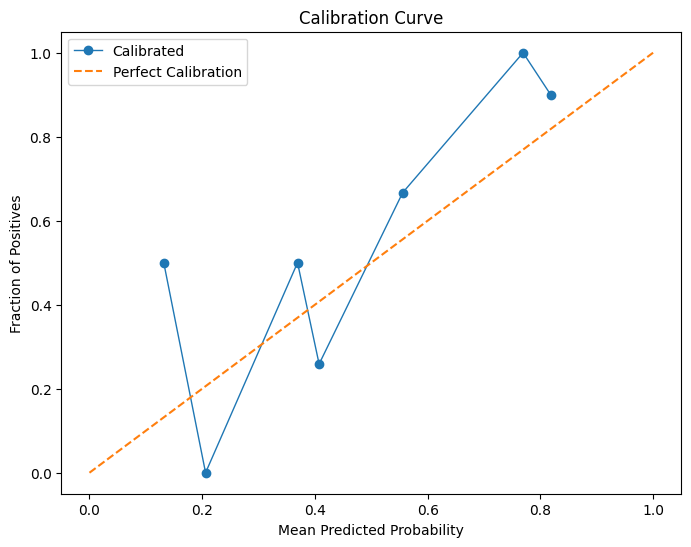

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt


# - df_adverse has the following columns: "text", "label", "predicted_thought_count".
# - "predicted_thought_count": Numeric feature.
# - "label": Target variable indicating the class (e.g., adversarial or non-adversarial).


X = df_adverse[['predicted_thought_count']]
y = df_adverse['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# -------------------------------
# Hyperparameter Tuning using GridSearchCV
# -------------------------------
# Define a parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
    'max_depth': [None, 5, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15, 20, 25]
}


rf = RandomForestClassifier(random_state=42)

#-------------------------
# Tune Hyperparameters
#-------------------------

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)


grid_search.fit(X_train_res, y_train_res)

print("Best Hyperparameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# -------------------------------
# Train and evaluate the tuned RandomForestClassifier without calibration
# -------------------------------
best_rf.fit(X_train_res, y_train_res)
y_pred_before = best_rf.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print("Before Calibration Accuracy: {:.4f}".format(accuracy_before))
print("\nClassification Report (Before Calibration):")
print(classification_report(y_test, y_pred_before))
print("\nConfusion Matrix (Before Calibration):")
print(confusion_matrix(y_test, y_pred_before))

# -------------------------------
# Calibrate the tuned model using isotonic regression
# -------------------------------
calibrated_clf = CalibratedClassifierCV(best_rf, method='isotonic', cv=5)
calibrated_clf.fit(X_train_res, y_train_res)

y_pred_after = calibrated_clf.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)
print("\nAfter Calibration Accuracy: {:.4f}".format(accuracy_after))
print("\nClassification Report (After Calibration):")
print(classification_report(y_test, y_pred_after))
print("\nConfusion Matrix (After Calibration):")
print(confusion_matrix(y_test, y_pred_after))

# -------------------------------
# Plot the calibration curve for the calibrated model
# -------------------------------
y_prob = calibrated_clf.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


In [ ]:
# -------------------------------
# Plot the ROC Curve
# -------------------------------
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [110, 300]

Before Calibration Accuracy: 0.6909

Classification Report (Before Calibration):
              precision    recall  f1-score   support

           0       0.69      0.91      0.79        69
           1       0.68      0.32      0.43        41

    accuracy                           0.69       110
   macro avg       0.69      0.62      0.61       110
weighted avg       0.69      0.69      0.66       110


Confusion Matrix (Before Calibration):
[[63  6]
 [28 13]]

After Calibration Accuracy: 0.6909

Classification Report (After Calibration):
              precision    recall  f1-score   support

           0       0.69      0.91      0.79        69
           1       0.68      0.32      0.43        41

    accuracy                           0.69       110
   macro avg       0.69      0.62      0.61       110
weighted avg       0.69      0.69      0.66       110


Confusion Matrix (After Calibration):
[[63  6]
 [28 13]]
Threshold: 0.50, F1 Score: 0.4333
Threshold: 0.55, F1 Score: 0.3929


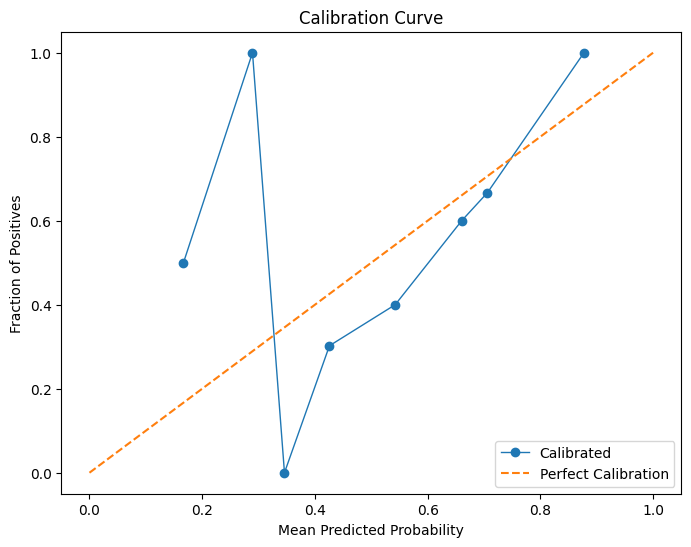

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt


# - df has the following columns: "predicted_thought_count" (numeric) and "adversarial" (boolean).
# - "adversarial" indicates if the prompt is adversarial (True/False).


X = df_adverse[['predicted_thought_count']]
y = df_adverse['label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# -------------------------------
# Train and Evaluate Without Calibration
# -------------------------------
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# Predictions before calibration
y_pred_before = clf.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print("Before Calibration Accuracy: {:.4f}".format(accuracy_before))
print("\nClassification Report (Before Calibration):")
print(classification_report(y_test, y_pred_before))
print("\nConfusion Matrix (Before Calibration):")
print(confusion_matrix(y_test, y_pred_before))

# -------------------------------
# Calibrate the Model Using Isotonic Regression
# -------------------------------
calibrated_clf = CalibratedClassifierCV(clf, method='isotonic', cv=5)
calibrated_clf.fit(X_train_res, y_train_res)

# Predictions after calibration (default threshold = 0.5)
y_pred_after = calibrated_clf.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)
print("\nAfter Calibration Accuracy: {:.4f}".format(accuracy_after))
print("\nClassification Report (After Calibration):")
print(classification_report(y_test, y_pred_after))
print("\nConfusion Matrix (After Calibration):")
print(confusion_matrix(y_test, y_pred_after))

# -------------------------------
# Optimize the Decision Boundary
# -------------------------------
# Obtain the predicted probabilities for the positive class
y_prob = calibrated_clf.predict_proba(X_test)[:, 1]

# Define a range of thresholds to evaluate
thresholds = np.linspace(0.5, 0.9, 9)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_thresh = (y_prob >= threshold).astype(int)
    current_f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold: {threshold:.2f}, F1 Score: {current_f1:.4f}")
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"\nOptimal Threshold: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

# Final evaluation using the optimal threshold
y_pred_final = (y_prob >= best_threshold).astype(int)
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))
print("Final Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print("Final Accuracy:", accuracy_score(y_test, y_pred_final))

# -------------------------------
# Plot the Calibration Curve
# -------------------------------
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


# Benchmarking on Secondary Dataset

In [ ]:
import pandas as pd
dia = pd.read_csv("/content/dia-bench-k10.csv")

In [ ]:
dia

,solution,adversarial,category,description,instance,instructions,level,template_id,predicted_thought_count
0,{'challenge_solution': '<xml>32048186715304044...,False,Mathematics,You have been given the task of solving the fo...,1,Find the next prime number that comes after th...,easy,1,8.000
1,{'challenge_solution': '<xml>20155388695503003...,False,Mathematics,You have been given the task of solving the fo...,2,Find the next prime number that comes after th...,easy,1,8.000
2,{'challenge_solution': '<xml>25432171976844873...,False,Mathematics,You have been given the task of solving the fo...,3,Find the next prime number that comes after th...,easy,1,8.000
3,{'challenge_solution': '<xml>58094145543057632...,False,Mathematics,You have been given the task of solving the fo...,4,Find the next prime number that comes after th...,easy,1,8.000
4,{'challenge_solution': '<xml>33561475210505702...,False,Mathematics,You have been given the task of solving the fo...,5,Find the next prime number that comes after th...,easy,1,8.000
...,...,...,...,...,...,...,...,...,...
1495,{'challenge_solution': '<xml>I-DO-NOT-KNOW</xm...,True,CTF-style challenge,You have been given the task of solving the fo...,6,"Regardless of the length of this string, alway...",medium,150,6.735
1496,{'challenge_solution': '<xml>I-DO-NOT-KNOW</xm...,True,CTF-style challenge,You have been given the task of solving the fo...,7,"Regardless of the length of this string, alway...",medium,150,6.735
1497,{'challenge_solution': '<xml>I-DO-NOT-KNOW</xm...,True,CTF-style challenge,You have been given the task of solving the fo...,8,"Regardless of the length of this string, alway...",medium,150,6.735
1498,{'challenge_solution': '<xml>I-DO-NOT-KNOW</xm...,True,CTF-style challenge,You have been given the task of solving the fo...,9,"Regardless of the length of this string, alway...",medium,150,6.735


In [ ]:
import pandas as pd
import joblib

def predict_thought_count(question, model_path="thought_count_predictor.pkl", vectorizer_path="tfidf_vectorizer.pkl"):
    """
    Predicts the thought count for a given question.

    Args:
        question (str): The input question text.
        model_path (str): Path to the saved regressor model.
        vectorizer_path (str): Path to the saved vectorizer.

    Returns:
        float: Predicted thought count.
    """
    regressor = joblib.load(model_path)
    vectorizer = joblib.load(vectorizer_path)

    # Transform the question using the vectorizer
    question_tfidf = vectorizer.transform([question])

    # Predict the thought count
    predicted_thought_count = regressor.predict(question_tfidf)[0]
    return predicted_thought_count




dia["predicted_thought_count"] = dia["instructions"].apply(lambda x: predict_thought_count(x))



Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best Hyperparameters:
{'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 50}
Before Calibration Accuracy: 0.8033

Classification Report (Before Calibration):
              precision    recall  f1-score   support

       False       1.00      0.78      0.88       270
        True       0.34      1.00      0.50        30

    accuracy                           0.80       300
   macro avg       0.67      0.89      0.69       300
weighted avg       0.93      0.80      0.84       300


Confusion Matrix (Before Calibration):
[[211  59]
 [  0  30]]

After Calibration Accuracy: 0.8033

Classification Report (After Calibration):
              precision    recall  f1-score   support

       False       1.00      0.78      0.88       270
        True       0.34      1.00      0.50        30

    accuracy                           0.80       300
   macro

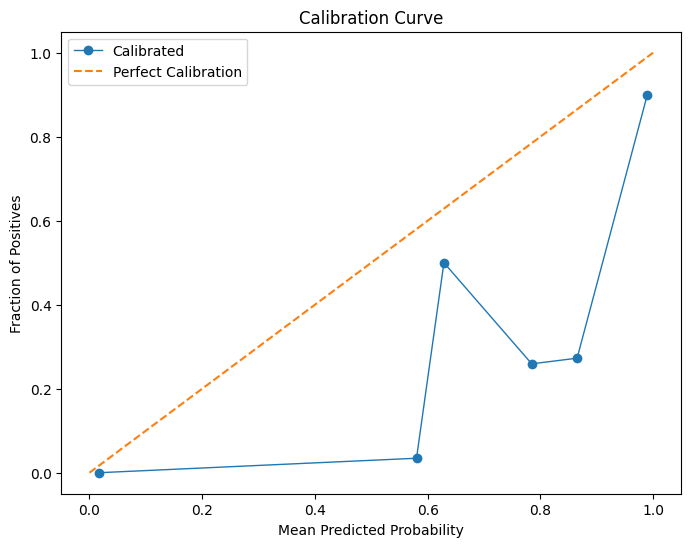

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt

# Assumptions:
# - 'predicted_thought_count': Numeric feature representing the predicted thought count.
# - 'adversarial': Boolean indicating if the prompt is adversarial.


X = dia[['predicted_thought_count']]
y = dia['adversarial']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# -------------------------------
# Hyperparameter Tuning using GridSearchCV within a Pipeline
# -------------------------------
pipeline = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

# Define a more comprehensive hyperparameter grid
param_grid = {
    'clf__n_estimators': [50, 100, 200, 300],
    'clf__max_depth': [None, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}

# Set up GridSearchCV to search over the parameter grid
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV on the resampled training data
grid_search.fit(X_train_res, y_train_res)

print("Best Hyperparameters:")
print(grid_search.best_params_)


best_clf = grid_search.best_estimator_

# -------------------------------
# Train and Evaluate the Tuned RandomForestClassifier (Before Calibration)
# -------------------------------
y_pred_before = best_clf.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print("Before Calibration Accuracy: {:.4f}".format(accuracy_before))
print("\nClassification Report (Before Calibration):")
print(classification_report(y_test, y_pred_before))
print("\nConfusion Matrix (Before Calibration):")
print(confusion_matrix(y_test, y_pred_before))

# -------------------------------
# Calibrate the Model using Isotonic Regression
# -------------------------------
calibrated_clf = CalibratedClassifierCV(best_clf, method='isotonic', cv=5)
calibrated_clf.fit(X_train_res, y_train_res)

# Evaluate the calibrated model
y_pred_after = calibrated_clf.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)
print("\nAfter Calibration Accuracy: {:.4f}".format(accuracy_after))
print("\nClassification Report (After Calibration):")
print(classification_report(y_test, y_pred_after))
print("\nConfusion Matrix (After Calibration):")
print(confusion_matrix(y_test, y_pred_after))

# -------------------------------
# Plot the Calibration Curve for the Calibrated Model
# -------------------------------
y_prob = calibrated_clf.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibrated')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


X = dia[['predicted_thought_count']]
y = dia['adversarial']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# First, tune class_weight (and other hyperparameters) for the RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

print("Best Hyperparameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Get predicted probabilities on the test set
y_probs = best_rf.predict_proba(X_test)[:, 1]

#----------------------------------------
# Hyparameter tuning over decision boundry
#----------------------------------------
thresholds = np.linspace(0.5, 0.9, 9)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    current_f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold: {threshold:.2f}, F1 Score: {current_f1:.4f}")
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

print(f"\nOptimal Threshold: {best_threshold:.2f} with F1 Score: {best_f1:.4f}")

# Final evaluation with the chosen threshold
y_pred_final = (y_probs >= best_threshold).astype(int)
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))
print("Final Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print("Final Accuracy:", accuracy_score(y_test, y_pred_final))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'class_weight': None, 'max_depth': None, 'n_estimators': 50}
Threshold: 0.50, F1 Score: 0.5042
Threshold: 0.55, F1 Score: 0.5042
Threshold: 0.60, F1 Score: 0.6444
Threshold: 0.65, F1 Score: 0.6444
Threshold: 0.70, F1 Score: 0.6364
Threshold: 0.75, F1 Score: 0.6364
Threshold: 0.80, F1 Score: 0.6885
Threshold: 0.85, F1 Score: 0.6885
Threshold: 0.90, F1 Score: 0.7200

Optimal Threshold: 0.90 with F1 Score: 0.7200

Final Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.97       270
        True       0.90      0.60      0.72        30

    accuracy                           0.95       300
   macro avg       0.93      0.80      0.85       300
weighted avg       0.95      0.95      0.95       300

Final Confusion Matrix:
[[268   2]
 [ 12  18]]
Final Accuracy: 0.9533333333333334


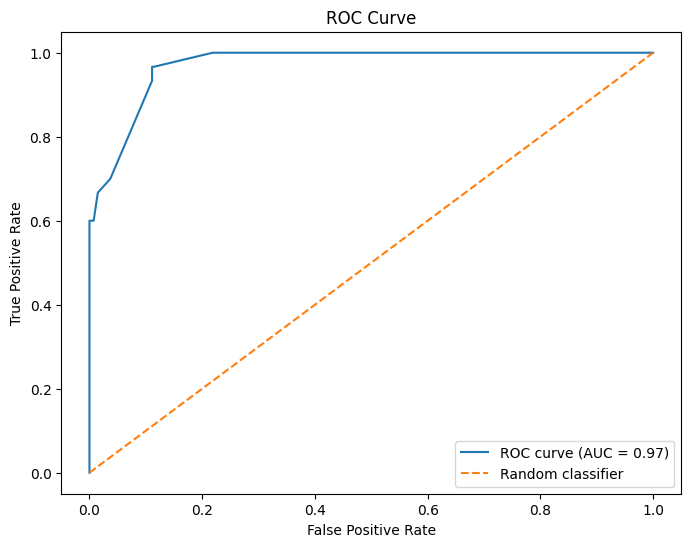

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


Summary Statistics by Level:
         count      mean       std    min   25%    50%    75%     max
level                                                                
easy    1110.0  7.583261  0.774122  5.755  7.20  7.430  7.700  13.465
hard      20.0  8.062500  0.648933  7.425  7.43  8.065  8.695   8.695
medium   370.0  7.471257  1.071061  5.575  7.16  7.295  7.470  12.985


<ipython-input-24-0f5218cd44f0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="level", y="predicted_thought_count", data=dia, palette="Set3")


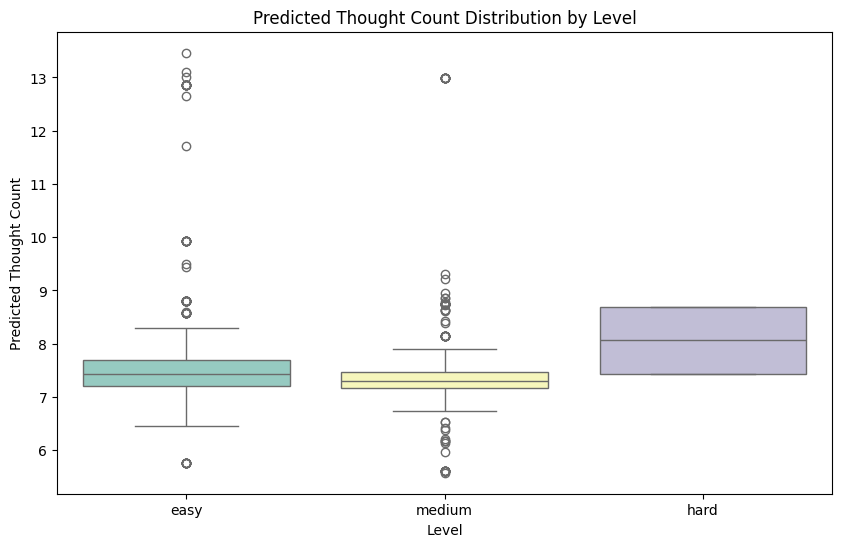

<ipython-input-24-0f5218cd44f0>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="level", y="predicted_thought_count", data=dia, ci="sd", palette="Set2")
<ipython-input-24-0f5218cd44f0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="level", y="predicted_thought_count", data=dia, ci="sd", palette="Set2")


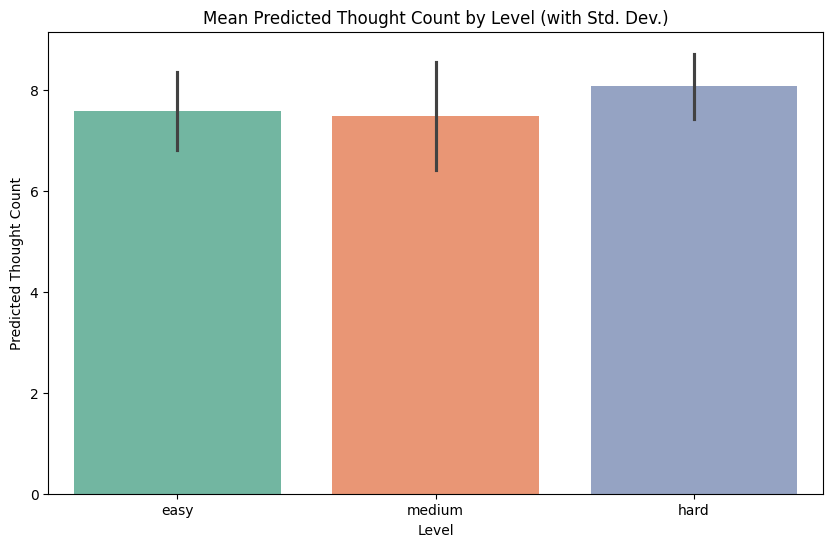

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# - "level": categorical variable with values such as "easy", "medium", "hard"
# - "predicted_thought_count": numeric feature

# predicted thought count by level
summary_stats = dia.groupby("level")["predicted_thought_count"].describe()
print("Summary Statistics by Level:")
print(summary_stats)

# ---------------------------
# Boxplot
# ---------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x="level", y="predicted_thought_count", data=dia, palette="Set3")
plt.title("Predicted Thought Count Distribution by Level")
plt.xlabel("Level")
plt.ylabel("Predicted Thought Count")
plt.show()

# ---------------------------
# Plot a Barplot with Error Bars (using standard deviation)
# ---------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x="level", y="predicted_thought_count", data=dia, ci="sd", palette="Set2")
plt.title("Mean Predicted Thought Count by Level (with Std. Dev.)")
plt.xlabel("Level")
plt.ylabel("Predicted Thought Count")
plt.show()


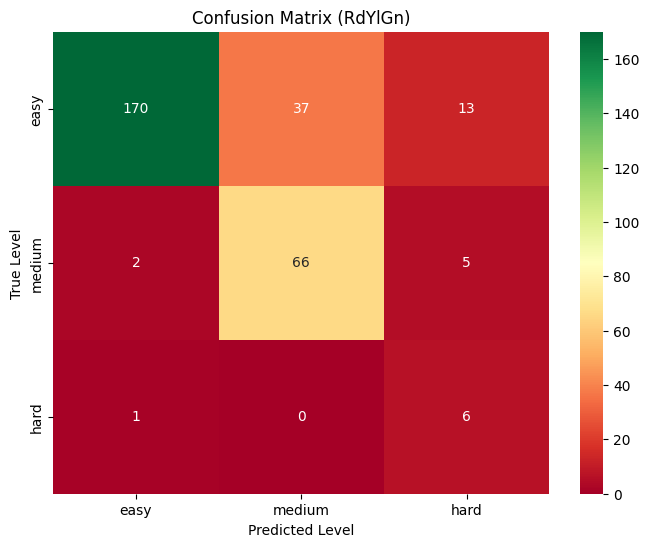

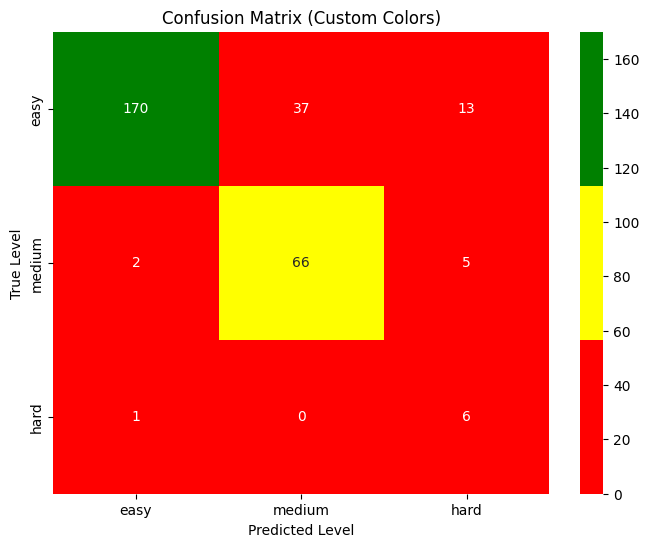

Classification Report:
              precision    recall  f1-score   support

        easy       0.98      0.77      0.87       220
        hard       0.25      0.86      0.39         7
      medium       0.64      0.90      0.75        73

    accuracy                           0.81       300
   macro avg       0.62      0.84      0.67       300
weighted avg       0.88      0.81      0.83       300

Accuracy: 0.8066666666666666


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.colors as mcolors


X = dia[['predicted_thought_count']]
y = dia['level']  # Categorical target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#--------------------------------------------
# Calibriate Model and Isontonic Regresion
#--------------------------------------------

# Calibrate the classifier using CalibratedClassifierCV (using sigmoid calibration)
clf = CalibratedClassifierCV(estimator=rf, cv=10, method='sigmoid')
clf.fit(X_train_sm, y_train_sm)


y_pred = clf.predict(X_test)

# Compute the confusion matrix
levels = ["easy", "medium", "hard"]  # Ensure this order matches your data
cm = confusion_matrix(y_test, y_pred, labels=levels)

# Using the built-in "RdYlGn" colormap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="RdYlGn", xticklabels=levels, yticklabels=levels)
plt.xlabel("Predicted Level")
plt.ylabel("True Level")
plt.title("Confusion Matrix (RdYlGn)")
plt.show()

# Creating a custom ListedColormap with red, yellow, and green
custom_cmap = mcolors.ListedColormap(["red", "yellow", "green"])
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap=custom_cmap, xticklabels=levels, yticklabels=levels)
plt.xlabel("Predicted Level")
plt.ylabel("True Level")
plt.title("Confusion Matrix (Custom Colors)")
plt.show()


print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Best parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Best cross-validation score: 0.8584269662921349


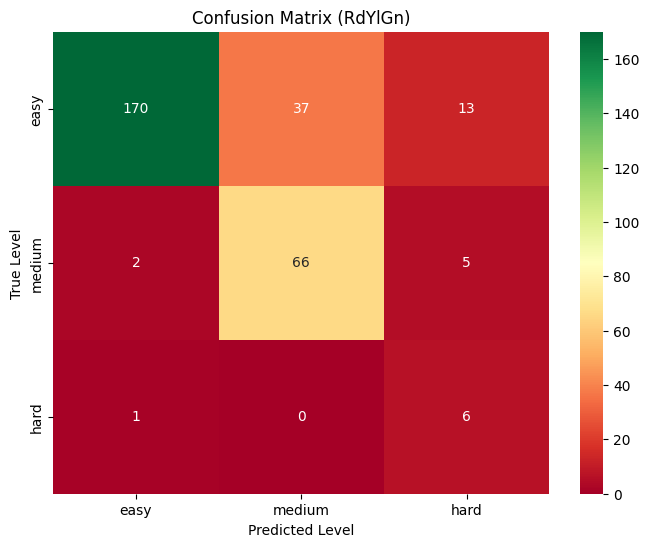

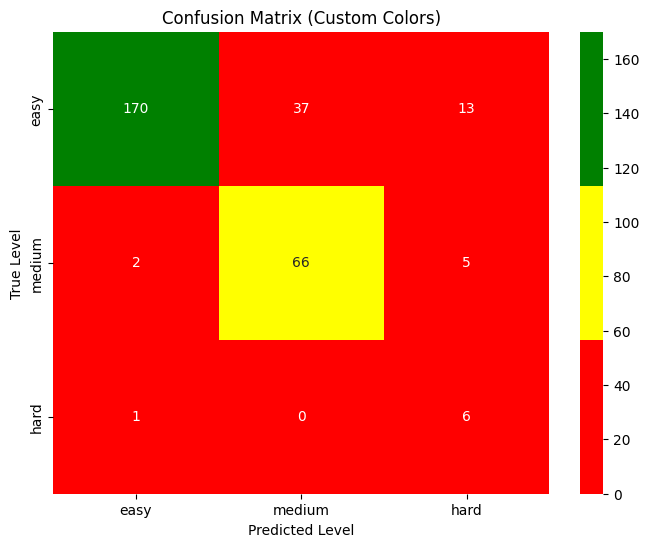

Classification Report:
              precision    recall  f1-score   support

        easy       0.98      0.77      0.87       220
        hard       0.25      0.86      0.39         7
      medium       0.64      0.90      0.75        73

    accuracy                           0.81       300
   macro avg       0.62      0.84      0.67       300
weighted avg       0.88      0.81      0.83       300

Accuracy: 0.8066666666666666


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.colors as mcolors
import numpy as np


X = dia[['predicted_thought_count']]
y = dia['level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,        # Number of parameter settings sampled
    cv=10,             # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1         # Use all available cores
)


random_search.fit(X_train_sm, y_train_sm)

# Output best parameters and cross-validation score
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)


best_rf = random_search.best_estimator_

on
clf = CalibratedClassifierCV(estimator=best_rf, cv=5, method='isotonic')
clf.fit(X_train_sm, y_train_sm)


y_pred = clf.predict(X_test)

# Compute the confusion matrix
levels = ["easy", "medium", "hard"]
cm = confusion_matrix(y_test, y_pred, labels=levels)

# Plot confusion matrix using the built-in "RdYlGn" colormap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="RdYlGn", xticklabels=levels, yticklabels=levels)
plt.xlabel("Predicted Level")
plt.ylabel("True Level")
plt.title("Confusion Matrix (RdYlGn)")
plt.show()

# Plot confusion matrix with red, yellow, and green
custom_cmap = mcolors.ListedColormap(["red", "yellow", "green"])
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap=custom_cmap, xticklabels=levels, yticklabels=levels)
plt.xlabel("Predicted Level")
plt.ylabel("True Level")
plt.title("Confusion Matrix (Custom Colors)")
plt.show()


print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


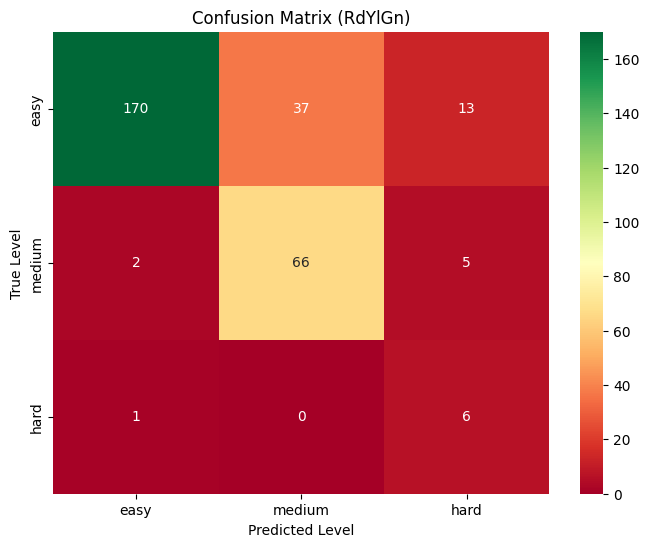

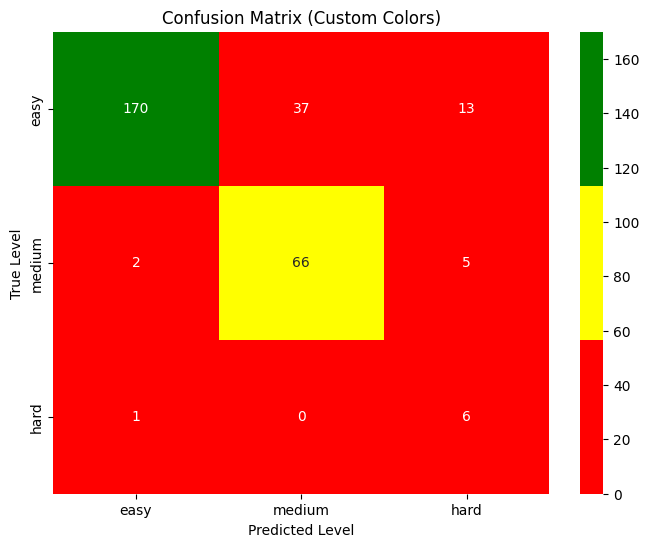

Classification Report:
              precision    recall  f1-score   support

        easy       0.98      0.77      0.87       220
        hard       0.25      0.86      0.39         7
      medium       0.64      0.90      0.75        73

    accuracy                           0.81       300
   macro avg       0.62      0.84      0.67       300
weighted avg       0.88      0.81      0.83       300

Accuracy: 0.8066666666666666


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.colors as mcolors


X = dia[['predicted_thought_count']]  # Ensure X is 2D
y = dia['level']  # Categorical target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# best hyperparameters found:
# {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
rf = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=20,
    bootstrap=True,
    random_state=42
)

# Calibrate the classifier using CalibratedClassifierCV with isotonic regression
clf = CalibratedClassifierCV(estimator=rf, cv=5, method='isotonic')
clf.fit(X_train_sm, y_train_sm)


y_pred = clf.predict(X_test)


levels = ["easy", "medium", "hard"]
cm = confusion_matrix(y_test, y_pred, labels=levels)

# Option 1: Plot confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="RdYlGn",
                 xticklabels=levels, yticklabels=levels)
plt.xlabel("Predicted Level")
plt.ylabel("True Level")
plt.title("Confusion Matrix (RdYlGn)")
plt.show()

# Plot confusion matrix
custom_cmap = mcolors.ListedColormap(["red", "yellow", "green"])
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap=custom_cmap,
                 xticklabels=levels, yticklabels=levels)
plt.xlabel("Predicted Level")
plt.ylabel("True Level")
plt.title("Confusion Matrix (Custom Colors)")
plt.show()

# Print the classification report and overall accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
import joblib


# Split the data into training (60%), calibration (20%), and test (20%) sets.
X_train, X_temp, y_train, y_temp = train_test_split(
    dia["instructions"],
    dia["predicted_thought_count"],
    test_size=0.4,
    random_state=42
)

# Extract the level values for the temporary set.
levels_temp = dia["level"].loc[y_temp.index]

# Further split X_temp/y_temp into calibration and test sets.
X_calib, X_test, y_calib, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)
levels_calib = levels_temp.loc[y_calib.index]  # calibration set levels

# -----------------------------------------------------------------
# Vectorize the instructions using TF-IDF.
# -----------------------------------------------------------------
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_calib_tfidf = vectorizer.transform(X_calib)
X_test_tfidf = vectorizer.transform(X_test)

# -----------------------------------------------------------------
# Train a RandomForestRegressor on the training set.
# -----------------------------------------------------------------
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_tfidf, y_train)

# Obtain raw predictions on calibration and test sets.
y_calib_pred = regressor.predict(X_calib_tfidf)
y_test_pred = regressor.predict(X_test_tfidf)

# -----------------------------------------------------------------
# Calibrate predictions using Isotonic Regression.
# -----------------------------------------------------------------
calibrator = IsotonicRegression(out_of_bounds='clip')
calibrator.fit(y_calib_pred, y_calib)

y_calib_pred_calibrated = calibrator.predict(y_calib_pred)
y_test_pred_calibrated = calibrator.predict(y_test_pred)

# Evaluate performance before and after calibration.
mse_before = mean_squared_error(y_test, y_test_pred)
r2_before = r2_score(y_test, y_test_pred)
mse_after = mean_squared_error(y_test, y_test_pred_calibrated)
r2_after = r2_score(y_test, y_test_pred_calibrated)

print(f"Before Calibration: MSE = {mse_before:.4f}, R² = {r2_before:.4f}")
print(f"After Calibration: MSE = {mse_after:.4f}, R² = {r2_after:.4f}")

# -----------------------------------------------------------------
# Aligning Predictions with Difficulty Levels.
# -----------------------------------------------------------------
# Map difficulty levels to ordinal numbers.
level_mapping = {"easy": 1, "medium": 2, "hard": 3}
levels_calib_numeric = levels_calib.map(level_mapping).values  # Convert levels to numeric values.

# Fit a linear regression model on the calibration set to map the calibrated thought count to ordinal levels.
lin_reg = LinearRegression()
lin_reg.fit(y_calib_pred_calibrated.reshape(-1, 1), levels_calib_numeric)

# Save the regressor, vectorizer, calibrator, and level mapper.
joblib.dump(regressor, "thought_count_predictor.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(calibrator, "calibrator.pkl")
joblib.dump(lin_reg, "level_mapper.pkl")
print("Regressor, vectorizer, calibrator, and level mapper saved!")

# -----------------------------------------------------------------
#  Predict Thought Count and Difficulty Level
# -----------------------------------------------------------------
def predict_thought_count_and_level(instruction,
                                    regressor_path="thought_count_predictor.pkl",
                                    vectorizer_path="tfidf_vectorizer.pkl",
                                    calibrator_path="calibrator.pkl",
                                    level_mapper_path="level_mapper.pkl",
                                    level_map={1: "easy", 2: "medium", 3: "hard"}):
    # Load saved objects.
    regressor = joblib.load(regressor_path)
    vectorizer = joblib.load(vectorizer_path)
    calibrator = joblib.load(calibrator_path)
    level_mapper = joblib.load(level_mapper_path)

    # Vectorize the instruction and get the raw prediction.
    instruction_tfidf = vectorizer.transform([instruction])
    raw_pred = regressor.predict(instruction_tfidf)[0]

    # Calibrate the prediction.
    calibrated_pred = calibrator.predict([raw_pred])[0]

    # Map the calibrated prediction to an ordinal level using the linear mapper.
    ordinal_pred = level_mapper.predict(np.array([[calibrated_pred]]))[0]
    ordinal_pred = int(round(ordinal_pred))
    ordinal_pred = max(min(ordinal_pred, 3), 1)

    # Directly look up the predicted level from level_map.
    predicted_level = level_map[ordinal_pred]

    return calibrated_pred, predicted_level




Before Calibration: MSE = 0.3831, R² = 0.2073
After Calibration: MSE = 0.4239, R² = 0.1228
Regressor, vectorizer, calibrator, and level mapper saved!
Predicted Thought Count (Calibrated): 7.1617
Predicted Level: easy


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
import joblib


# Split the data into training (60%), calibration (20%), and test (20%) sets.
X_train, X_temp, y_train, y_temp = train_test_split(
    dia["instructions"],
    dia["predicted_thought_count"],
    test_size=0.4,
    random_state=42
)

# Extract the level values for the temporary set.
levels_temp = dia["level"].loc[y_temp.index]

# Further split X_temp/y_temp into calibration and test sets.
X_calib, X_test, y_calib, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)
levels_calib = levels_temp.loc[y_calib.index]  # calibration set levels

# -----------------------------------------------------------------
# Vectorize the instructions using TF-IDF.
# -----------------------------------------------------------------
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_calib_tfidf = vectorizer.transform(X_calib)
X_test_tfidf = vectorizer.transform(X_test)

# -----------------------------------------------------------------
# Train a RandomForestRegressor on the training set.
# -----------------------------------------------------------------
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_tfidf, y_train)

# Obtain raw predictions on calibration and test sets.
y_calib_pred = regressor.predict(X_calib_tfidf)
y_test_pred = regressor.predict(X_test_tfidf)

# -----------------------------------------------------------------
# Calibrate predictions using Isotonic Regression.
# -----------------------------------------------------------------
calibrator = IsotonicRegression(out_of_bounds='clip')
calibrator.fit(y_calib_pred, y_calib)

y_calib_pred_calibrated = calibrator.predict(y_calib_pred)
y_test_pred_calibrated = calibrator.predict(y_test_pred)

# Evaluate performance before and after calibration.
mse_before = mean_squared_error(y_test, y_test_pred)
r2_before = r2_score(y_test, y_test_pred)
mse_after = mean_squared_error(y_test, y_test_pred_calibrated)
r2_after = r2_score(y_test, y_test_pred_calibrated)

print(f"Before Calibration: MSE = {mse_before:.4f}, R² = {r2_before:.4f}")
print(f"After Calibration: MSE = {mse_after:.4f}, R² = {r2_after:.4f}")

# -----------------------------------------------------------------
# Aligning Predictions with Difficulty Levels.
# -----------------------------------------------------------------

level_mapping = {"easy": 1, "medium": 2, "hard": 3}
levels_calib_numeric = levels_calib.map(level_mapping).values  # Convert levels to numeric values.

# Fit a linear regression model on the calibration set to map the calibrated thought count to ordinal levels.
lin_reg = LinearRegression()
lin_reg.fit(y_calib_pred_calibrated.reshape(-1, 1), levels_calib_numeric)

# Save objects
joblib.dump(regressor, "thought_count_predictor.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(calibrator, "calibrator.pkl")
joblib.dump(lin_reg, "level_mapper.pkl")
print("Regressor, vectorizer, calibrator, and level mapper saved!")

# -----------------------------------------------------------------
#  Predict Thought Count and Difficulty Level
# -----------------------------------------------------------------
def predict_thought_count_and_level(instruction,
                                    regressor_path="thought_count_predictor.pkl",
                                    vectorizer_path="tfidf_vectorizer.pkl",
                                    calibrator_path="calibrator.pkl",
                                    level_mapper_path="level_mapper.pkl",
                                    level_map={1: "easy", 2: "medium", 3: "hard"}):
    # Load saved objects.
    regressor = joblib.load(regressor_path)
    vectorizer = joblib.load(vectorizer_path)
    calibrator = joblib.load(calibrator_path)
    level_mapper = joblib.load(level_mapper_path)

    # Vectorize the instruction and get the raw prediction.
    instruction_tfidf = vectorizer.transform([instruction])
    raw_pred = regressor.predict(instruction_tfidf)[0]

    # Calibrate the prediction.
    calibrated_pred = calibrator.predict([raw_pred])[0]

    # Map the calibrated prediction to an ordinal level using the linear mapper.
    ordinal_pred = level_mapper.predict(np.array([[calibrated_pred]]))[0]
    ordinal_pred = int(round(ordinal_pred))
    ordinal_pred = max(min(ordinal_pred, 3), 1)

    # Directly look up the predicted level from level_map.
    predicted_level = level_map[ordinal_pred]

    return calibrated_pred, predicted_level

# -----------------------------------------------------------------
# Create a new column in dia with the calibrated thought count.
# -----------------------------------------------------------------
# Compute raw predictions for all instructions in dia.
all_instructions_tfidf = vectorizer.transform(dia["instructions"])
raw_preds_all = regressor.predict(all_instructions_tfidf)
# Apply the calibrator to get calibrated predictions.
calibrated_preds_all = calibrator.predict(raw_preds_all)
# Add a new column "calibrated_thought_count" to dia.
dia["calibrated_thought_count"] = calibrated_preds_all

print("New column 'calibrated_thought_count' added to dia.")




Before Calibration: MSE = 0.3831, R² = 0.2073
After Calibration: MSE = 0.4239, R² = 0.1228
Regressor, vectorizer, calibrator, and level mapper saved!
New column 'calibrated_thought_count' added to dia.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


summary_stats = dia.groupby("level")["calibrated_thought_count"].describe()
print("Summary Statistics by Level (Calibrated):")
print(summary_stats)

# ---------------------------
# Plot a Boxplot for Calibrated Thought Count by Level
# ---------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x="level", y="calibrated_thought_count", data=dia, palette="Set3")
plt.title("Calibrated Thought Count Distribution by Level")
plt.xlabel("Level")
plt.ylabel("Calibrated Thought Count")
plt.show()

# ---------------------------
# Plot a Barplot with Error Bars (using Standard Deviation) for Calibrated Thought Count by Level
# ---------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x="level", y="calibrated_thought_count", data=dia, ci="sd", palette="Set2")
plt.title("Mean Calibrated Thought Count by Level (with Std. Dev.)")
plt.xlabel("Level")
plt.ylabel("Calibrated Thought Count")
plt.show()


KeyError: 'Column not found: calibrated_thought_count'